In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

# set up colours to match the lecture slides
colours = {'A': '#FBAC18',
           'B': '#00AB8D'}

In [7]:
# define functions for d[A]/dt and d[B]/dt

def dA_by_dt(A, k):
    return - k * A

def dB_by_dt(A, k):
    return + k * A

In [8]:
# initialise the simulation

A0 = 1 # initial concentration of A
B0 = 0 # initial concentration of B

k = 0.5 # rate constant

# lists for storing data from each timestep
A_stored = [A0]
B_stored = [B0]
timesteps = [0]

dt = 0.5 # timestep for the integration algorithm

t = 0 # starting time
simulation_time = 5

# at t=0, the concentrations of A and B
# are equal to A0 and B0, respectively.
A = A0 
B = B0

# main simulation loop
while t < simulation_time:
    # predict the change in [A] and [B] in t → t+dt
    dA = dA_by_dt(A, k) * dt
    dB = dB_by_dt(A, k) * dt

    # update [A] and [B]
    A = A + dA
    B = B + dB

    # update the time
    t = t + dt   
    
    # store the predictions for the next timestep
    A_stored.append(A)
    B_stored.append(B)
    timesteps.append(t)

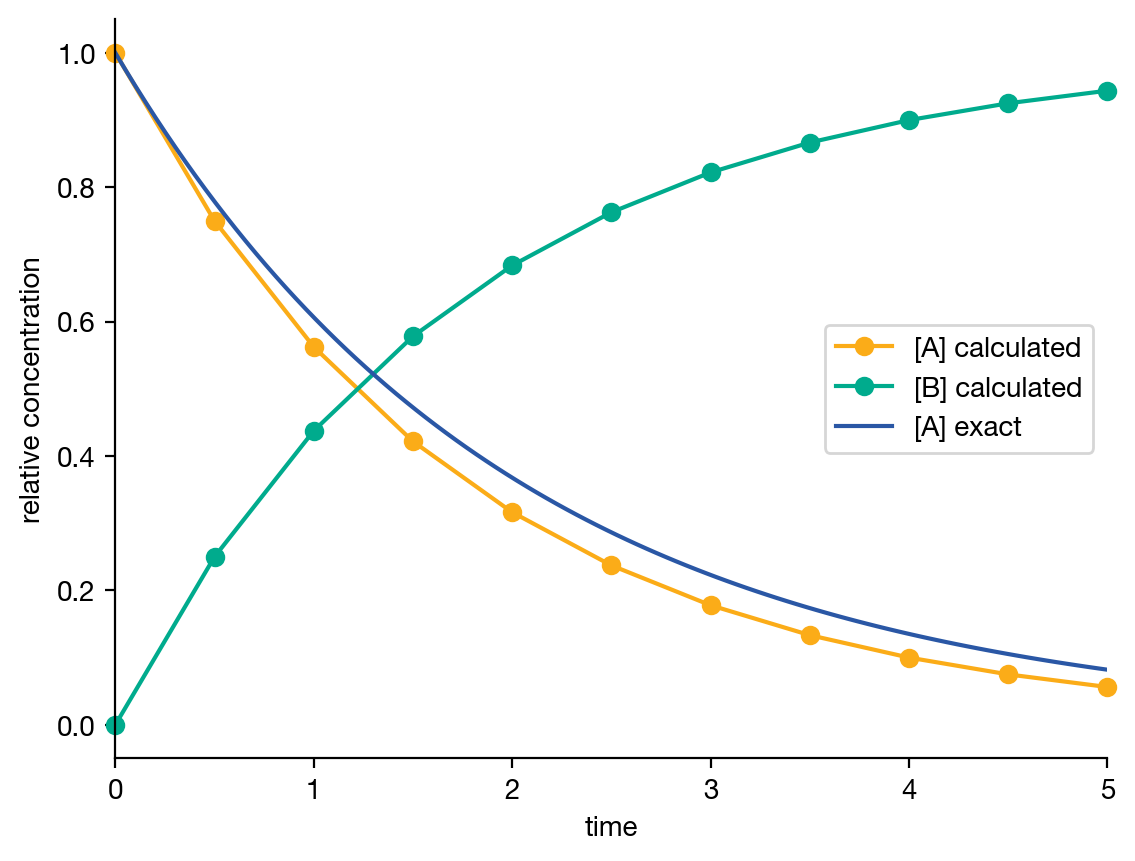

In [26]:
def exact_conc_of_A(t, A0, k):
    return A0 * np.exp(-k*t)

# set up the plot
ax = plt.subplot(111)
ax.spines[['right', 'top']].set_visible(False)

# plot [A] and [B] from the calculation
plt.plot(timesteps, A_stored, '-o', color=colours['A'], label='[A] calculated', clip_on=False)
plt.plot(timesteps, B_stored, '-o', color=colours['B'], label='[B] calculated', clip_on=False)

# plot the exact result for [A]
t_to_plot = np.linspace(0, simulation_time, 100)
plt.plot(t_to_plot, exact_conc_of_A(t_to_plot, A0, k), '-', color='#2a57a5', label='[A] exact')
         
# Add labels and the legend         
plt.xlabel('time')
plt.ylabel('relative concentration')
plt.legend()
                  
plt.xlim([0,simulation_time])
plt.show()

In [ ]:
timesteps